<h1 align='center'> Exploratory Data Analysis (EDA) </h1>

Dataset - Annual data of the number of registered health personnels in Singapore. This dataset is available at <a href="https://www.tablebuilder.singstat.gov.sg/publicfacing/createDataTable.action?refId=15173">singstat.gov.sg</a>. 

<h3 align='center'>Let's get started!</h3>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Assuming that the dataset has been downloaded in the same directory as this ipython file, let's see how to import the dataset. Pandas can read and import multiple file formats including csv, xls and json into Python. It can also read datasets directly from the internet using the website link. As the dataset we are using is stored in a csv file format, let's see how to import it:

In [2]:
#Usage of <TAB>
doc = pd.read_csv("reg_health.csv")
doc.head()

,Variables,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Doctors,na,na,na,na,na,na,na,na,na,...,"7,841","8,323","9,030","9,646","10,225","10,953","11,733","12,459","12,967","13,386"
1,Specialists Doctors,na,na,na,na,na,na,na,na,na,...,"2,962","3,180","3,374","3,635","3,867","4,124","4,485","4,788","5,047","5,338"
2,Non-specialists Doctors,na,na,na,na,na,na,na,na,na,...,"4,879","5,143","5,656","6,011","6,358","6,829","7,248","7,671","7,920","8,048"
3,Dentists,na,na,na,na,na,na,na,na,na,...,"1,484","1,531","1,579","1,611","1,699","1,821","1,905","2,060","2,198","2,293"
4,Pharmacists,na,na,na,na,na,na,na,na,na,...,"1,546","1,658","1,814","2,013","2,172","2,376","2,563","2,757","2,875","3,047"


Before moving forward, it is very important to understand what the values in the dataset represent. In the above table, it can be clearly seen that for every year the number of different registered health specialists are noted. In this case it isn't very difficult to understand the data as it is very small, however, when datasets get larger and the number of variables increase, understanding the data can sometimes become complicated. In the above data table, the variables are in the y-axis and the years are in the x-axis. Due to this, even for a single year, values for all the variables cannot be seen. First of all, let's see how many variables are there in total.

In [3]:
doc.shape

(8, 59)

Next, let's interchange the rows and columns with each other as we want the variables to be on the x-axis and the timeline to be on the y-axis. There is a direct in-built pandas function for this.

In [4]:
#T stands for transpose here. Transposition is a mathematical operation. It reflects a matrice over its diagonal
#Usage of <?>
doc = doc.T
doc.head()

,0,1,2,3,4,5,6,7
Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
1960,na,na,na,na,na,na,na,na
1961,na,na,na,na,na,na,na,na
1962,na,na,na,na,na,na,na,na
1963,na,na,na,na,na,na,na,na


Now the rows and columns have been interchanged, however the column names for the dataframe is still numerical as can be seen by the bold letters. Thus, let's change the column names to the Variables.

In [5]:
#show previous column names
#Explain different ways of accessing the values in the database (.loc, .iloc, direct access)
#doc.columns
#.loc is used for accessing data by the index and column names
# The labels that have been given to the index and column arrays have to be used. Row,column
#doc.loc['Variables':'1980',0]
#doc.loc['Variables':'1980'][0]
#.iloc is used to access data using integer positions. Row,column
#doc.iloc[0][1]
#Direct access - Column, row
#doc[0]['1960']

In [6]:
doc.columns = doc.loc['Variables']
doc.drop("Variables",axis=0,inplace=True)
doc.head()

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
1960,na,na,na,na,na,na,na,na
1961,na,na,na,na,na,na,na,na
1962,na,na,na,na,na,na,na,na
1963,na,na,na,na,na,na,na,na
1964,na,na,na,na,na,na,na,na


Next let's check if the values in the dataframe is in the correct format. For all the years shown in the above dataframe, there is only one value "na." "na" stands for not a number and means that the data is missing. It is also referred to as the null value or NaN. This missing value is a data type in numpy.

In [7]:
#a=None
#b=np.nan
#print (a,b)
#print ((3+a),(5*b))
#print(type(a),type(b))
#Some useful builtin pandas features for handling missing data are: isnull(), notnull(), dropna(), fillna()

Let's see what type of missing value is there in this dataframe.

In [8]:
doc.iloc[0][0]

' na '

In this dataframe, the nan's are simply string values and not None or np.nan. Now let's look at our DataFrame more closely to decide what to do with the value of nan.

In [9]:
doc

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
1960,na,na,na,na,na,na,na,na
1961,na,na,na,na,na,na,na,na
1962,na,na,na,na,na,na,na,na
1963,na,na,na,na,na,na,na,na
1964,na,na,na,na,na,na,na,na
1965,na,na,na,na,na,na,na,na
1966,na,na,na,na,na,na,na,na
1967,na,na,na,na,na,na,na,na
1968,na,na,na,na,na,na,na,na
1969,na,na,na,na,na,na,na,na


It can clearly be seen from this dataframe that as soon as number appears in a variable then there is no nan for the following years. This means that nan basically means that there were no registrations made for that health personnel in that year. Hence we will replace it with 0.

In [10]:
doc.replace(to_replace=' na ',value=0,inplace=True)

In [11]:
doc

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
1960,0,0,0,0,0,0,0,0
1961,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,0,0
1965,0,0,0,0,0,0,0,0
1966,0,0,0,0,0,0,0,0
1967,0,0,0,0,0,0,0,0
1968,0,0,0,0,0,0,0,0
1969,0,0,0,0,0,0,0,0


All the variables have a zero value until the year 1985, hence it doesn't makes sense to keep all that data. Let's remove all the years before 1985.

In [12]:
doc.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984'],axis=0,inplace=True)

In [13]:
doc

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
1985,"2,631",0,0,0,0,"6,286","2,107",0
1986,"2,781",0,0,0,0,"6,391","2,179",0
1987,"2,939",0,0,0,0,"6,438","2,285",0
1988,"3,162",0,0,0,0,"6,588","2,369",0
1989,"3,397",0,0,0,0,"6,778","2,459",0
1990,"3,573",0,0,0,0,"7,184","2,511",0
1991,"3,779",0,0,0,0,"7,570","2,663",0
1992,"3,962",0,0,0,0,"7,975","2,658",0
1993,"4,146",0,0,0,0,"8,461","2,666",0
1994,"4,301",0,0,0,0,"9,148","2,575",0


Now let's see the data type for each column. Although we can see that all are numbers, however in order to process them they need to be in int data type

In [14]:
doc.dtypes

Variables
Doctors                      object
Specialists Doctors          object
Non-specialists Doctors      object
Dentists                     object
Pharmacists                  object
Registered Nurses            object
Enrolled Nurses              object
Advanced Practice Nurses     object
dtype: object

All the data stored in each column is a Pandas object which in python data type is string.

In [15]:
doc.iloc[0,0]

'2,631'

Thus, let's convert all the string values to int. However, in the dataframe, it can be seen that the strings have commas in between them, thus they cannot be convert directly using int. All the commas have to be removed first. For this we, use the built in function replace. However, for replace only takes strings as inputs. However it is possible that some values might be int. Let's check this.

In [16]:
doc.iloc[0,1]

0

This is an integer value which we replaced instead of nan. So either we change that 0 to '0' in the previous function or we convert all the values in the dataframe to string again. Apart from the 0, no other value can be int as all have commas. Thus let's convert all the values to string.

In [17]:
for j in (range(len(doc.columns))):
    for i in range(len(doc)):
        doc.iloc[i,j]=str(doc.iloc[i,j])

In [18]:
for j in (range(len(doc.columns))):
    for i in range(len(doc)):
        doc.iloc[i,j]=int(doc.iloc[i,j].replace(',',''))

After all the individual elements have been converted to int, the dataframe also has to be converted into int. If we had done this before converting individual values to integer, it would have thrown an error.

In [19]:
doc = doc.astype(int)

In [20]:
doc.dtypes

Variables
Doctors                      int32
Specialists Doctors          int32
Non-specialists Doctors      int32
Dentists                     int32
Pharmacists                  int32
Registered Nurses            int32
Enrolled Nurses              int32
Advanced Practice Nurses     int32
dtype: object

Once data cleaning is done, it is time to form questions and hypothesis about the data which will be tested in this data analysis. After all, this is the main aim of EDA.

<b>
1. Is the rate at which doctors are increasing constant, increasing or decreasing?<br>
2. In 2017, which health personnel is present in the highest proportion?<br>
3. Which health personnel is increasing at the maximum rate in the year 2017?<br>
4. Does the increase in the number of doctors have a strong correlation with the increase in registered nurses?<br>
    </b>

The describe function is a very useful command of Pandas. It gives a range of statsitical calulations on each of the variables like the quartlies, maximum, minimum, standard deviation and mean.

In [21]:
doc.describe()

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,6580.303030,1236.363636,1992.818182,791.121212,932.424242,15126.212121,4789.424242,33.848485
std,3150.884107,1952.618399,3128.786201,859.531877,1067.510452,8186.877514,2355.062340,63.887656
min,2631.000000,0.000000,0.000000,0.000000,0.000000,6286.000000,2107.000000,0.000000
25%,4146.000000,0.000000,0.000000,0.000000,0.000000,8461.000000,2663.000000,0.000000
50%,5922.000000,0.000000,0.000000,0.000000,0.000000,12828.000000,4155.000000,0.000000
75%,8323.000000,3180.000000,5143.000000,1531.000000,1658.000000,19733.000000,6765.000000,37.000000
max,13386.000000,5338.000000,8048.000000,2293.000000,3047.000000,32672.000000,8931.000000,218.000000


In [22]:
doc['Doctors '][0]

2631

Thus let's start with the first question. To check the rate of increase of doctors, let us first compute a mathematical function which will give the rate of increase.

In [23]:
def growth_rate(variable_name):
    inc = [0]
    for i in range(1,len(doc)):
        inc.append((doc[variable_name][i]-doc[variable_name][i-1])/doc[variable_name][i-1])
    doc[(variable_name+"Growth Rate")] = inc

In [24]:
growth_rate("Doctors ")

In [25]:
doc.head()

Variables,Doctors,Specialists Doctors,Non-specialists Doctors,Dentists,Pharmacists,Registered Nurses,Enrolled Nurses,Advanced Practice Nurses,Doctors Growth Rate
1985,2631,0,0,0,0,6286,2107,0,0.000000
1986,2781,0,0,0,0,6391,2179,0,0.057013
1987,2939,0,0,0,0,6438,2285,0,0.056814
1988,3162,0,0,0,0,6588,2369,0,0.075876
1989,3397,0,0,0,0,6778,2459,0,0.074320


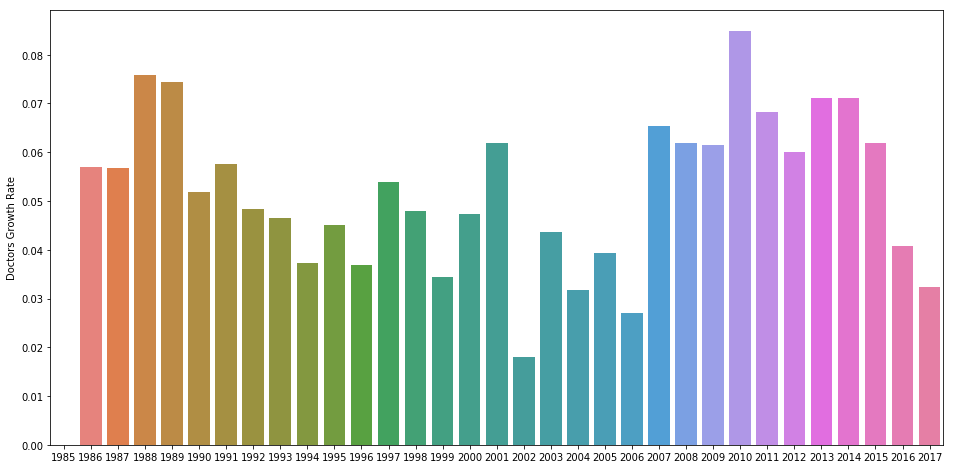

In [26]:
f,ax = plt.subplots(1,1,figsize=(16,8))
sb.barplot(y=doc["Doctors Growth Rate"],x=doc.index,palette = 'husl',ax=ax)

Hence for Question 1, no such thing can be said as data is increasing and decreasing both. However if we decrease our domain to only 4 years, then we can say that the number of doctors are increasing at a decreasing rate as the last four bars are decreasing.

For solving question 2, a pie chart can be drawn to view the proportion of each health personnel.

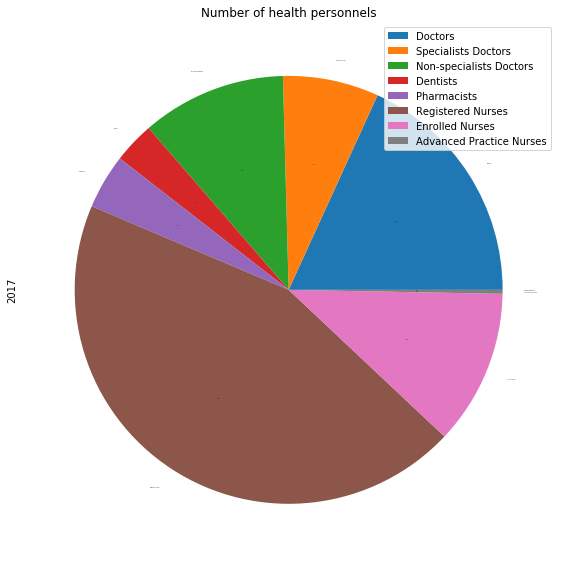

In [27]:
doc.loc['2017'].plot(kind = 'pie', fontsize = 0, title='Number of health personnels',
                       autopct='%1.1f%%',figsize=(8,8))
plt.legend(labels=['Doctors','Specialists Doctors','Non-specialists Doctors','Dentists','Pharmacists','Registered Nurses','Enrolled Nurses','Advanced Practice Nurses'], loc="best")
plt.tight_layout()

Thus registered nurses are present in the highest proportion in 2017

For the next question which is "Which health personnel is increasing at the maximum rate?", growth rate for all variables have to be calculated using the function defined before.

In [28]:
doc.columns

Index(['Doctors ', 'Specialists Doctors ', 'Non-specialists Doctors ',
       'Dentists ', 'Pharmacists ', 'Registered Nurses ', 'Enrolled Nurses ',
       'Advanced Practice Nurses ', 'Doctors Growth Rate'],
      dtype='object', name='Variables')

In [29]:
growth_rate("Specialists Doctors ")
growth_rate("Non-specialists Doctors ")
growth_rate("Dentists ")
growth_rate("Pharmacists ")
growth_rate("Registered Nurses ")
growth_rate("Enrolled Nurses ")
growth_rate("Advanced Practice Nurses ")

C:\Users\Hitesh\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
C:\Users\Hitesh\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [30]:
doc.columns[8:]

Index(['Doctors Growth Rate', 'Specialists Doctors Growth Rate',
       'Non-specialists Doctors Growth Rate', 'Dentists Growth Rate',
       'Pharmacists Growth Rate', 'Registered Nurses Growth Rate',
       'Enrolled Nurses Growth Rate', 'Advanced Practice Nurses Growth Rate'],
      dtype='object', name='Variables')

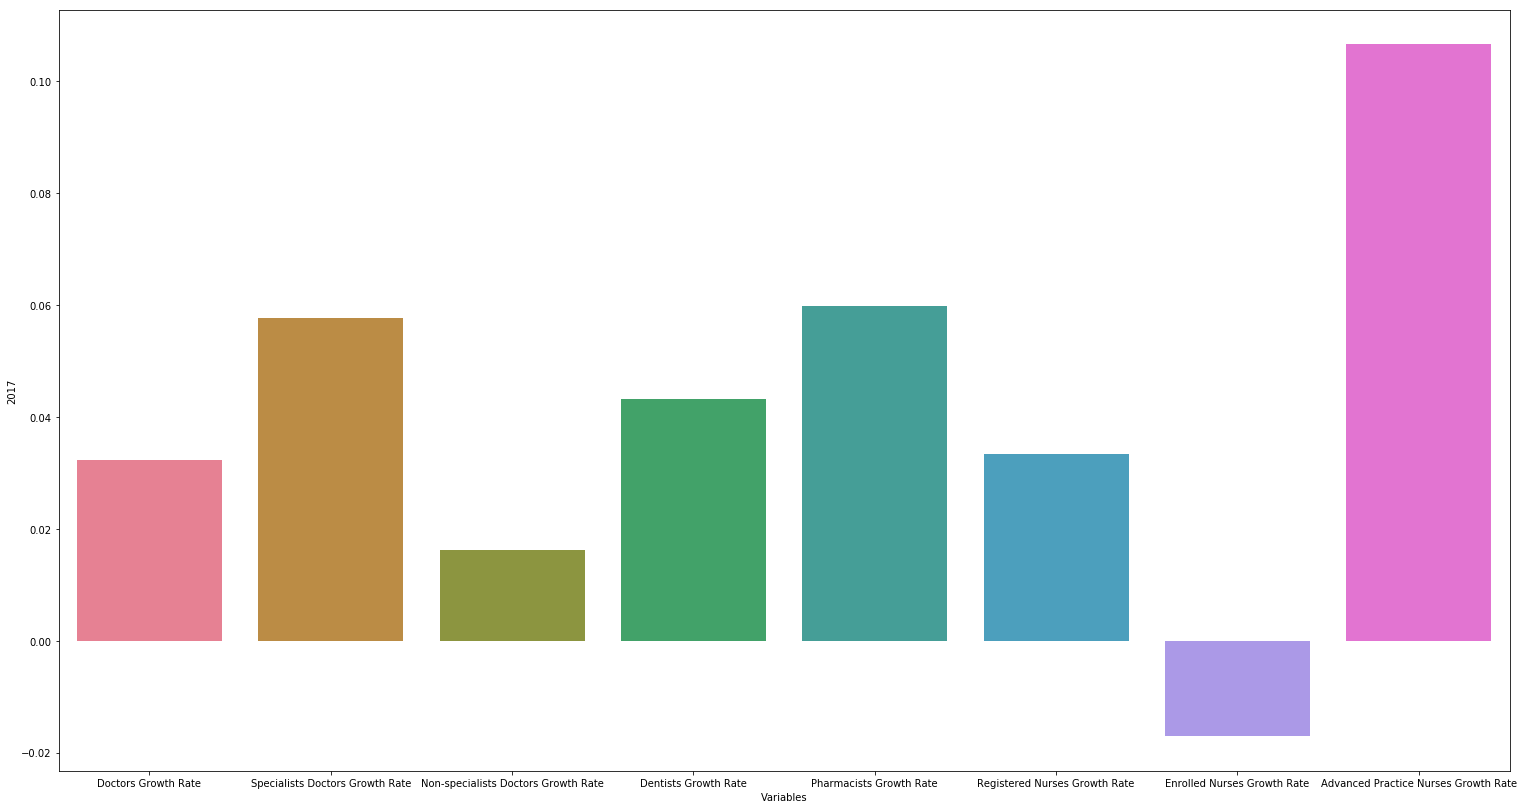

In [31]:
f,ax = plt.subplots(1,1,figsize=(26,14))
sb.barplot(y=doc.loc['2017']['Doctors Growth Rate': 'Advanced Practice Nurses Growth Rate'],x=doc.columns[8:],palette = 'husl',ax=ax)

Thus from this graph, it can clearly be seen that advanced practice nurses had the highest growth rate in 2017.

For the fourth question, plotting the graph for all the variables with each other is easier than plotting individually for Doctors and Nurses. Hence we will find the correlation for all the variables with each other.

In [32]:
doc.drop(['Doctors Growth Rate', 'Specialists Doctors Growth Rate',
       'Non-specialists Doctors Growth Rate', 'Dentists Growth Rate',
       'Pharmacists Growth Rate', 'Registered Nurses Growth Rate',
       'Enrolled Nurses Growth Rate', 'Advanced Practice Nurses Growth Rate'],axis=1,inplace=True)

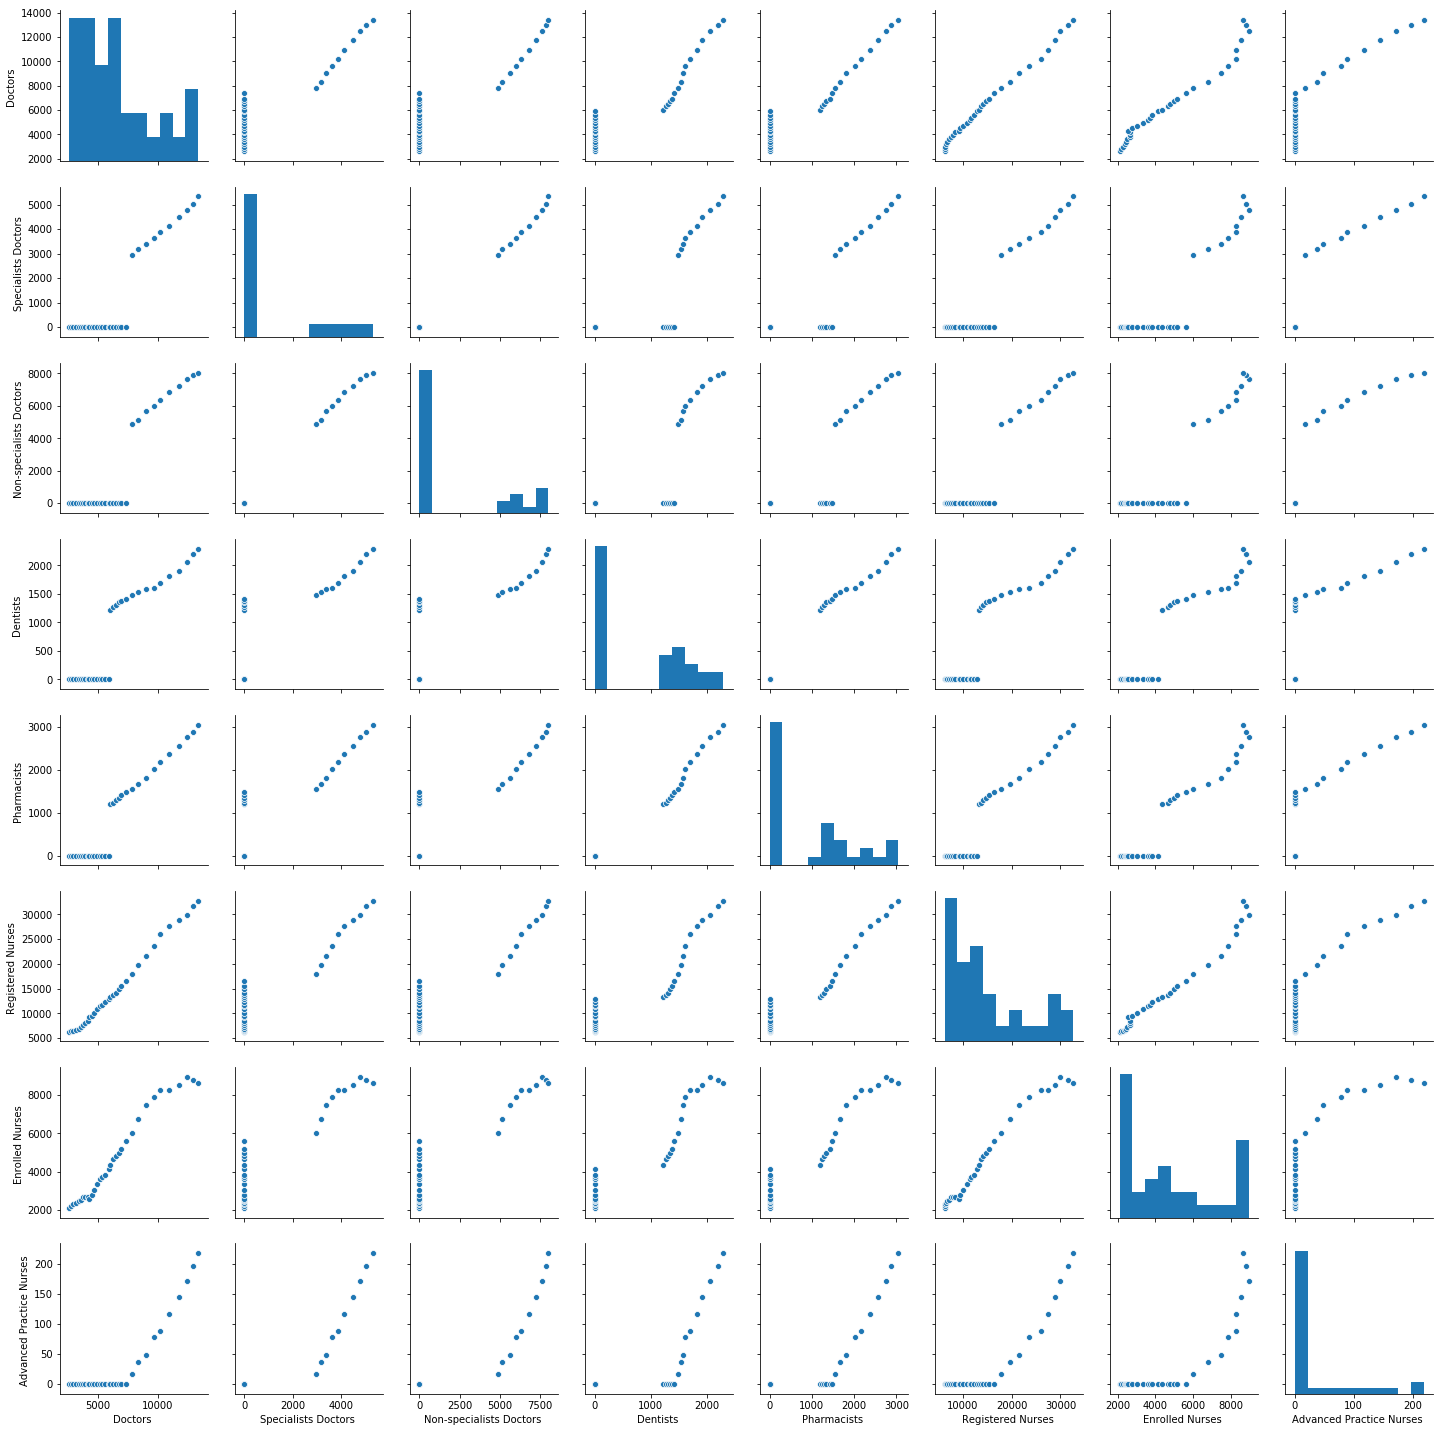

In [33]:
sb.pairplot(data=doc)

These graphs are very useful. They show how each variable varies with another variable. There are many linear relationships that can be identified. The graph for doctors and registered nurses is almost a straight line. Hence it tells that there is a strong correlation between them. Let's calculate the value for correlation and display it on a heatmap.

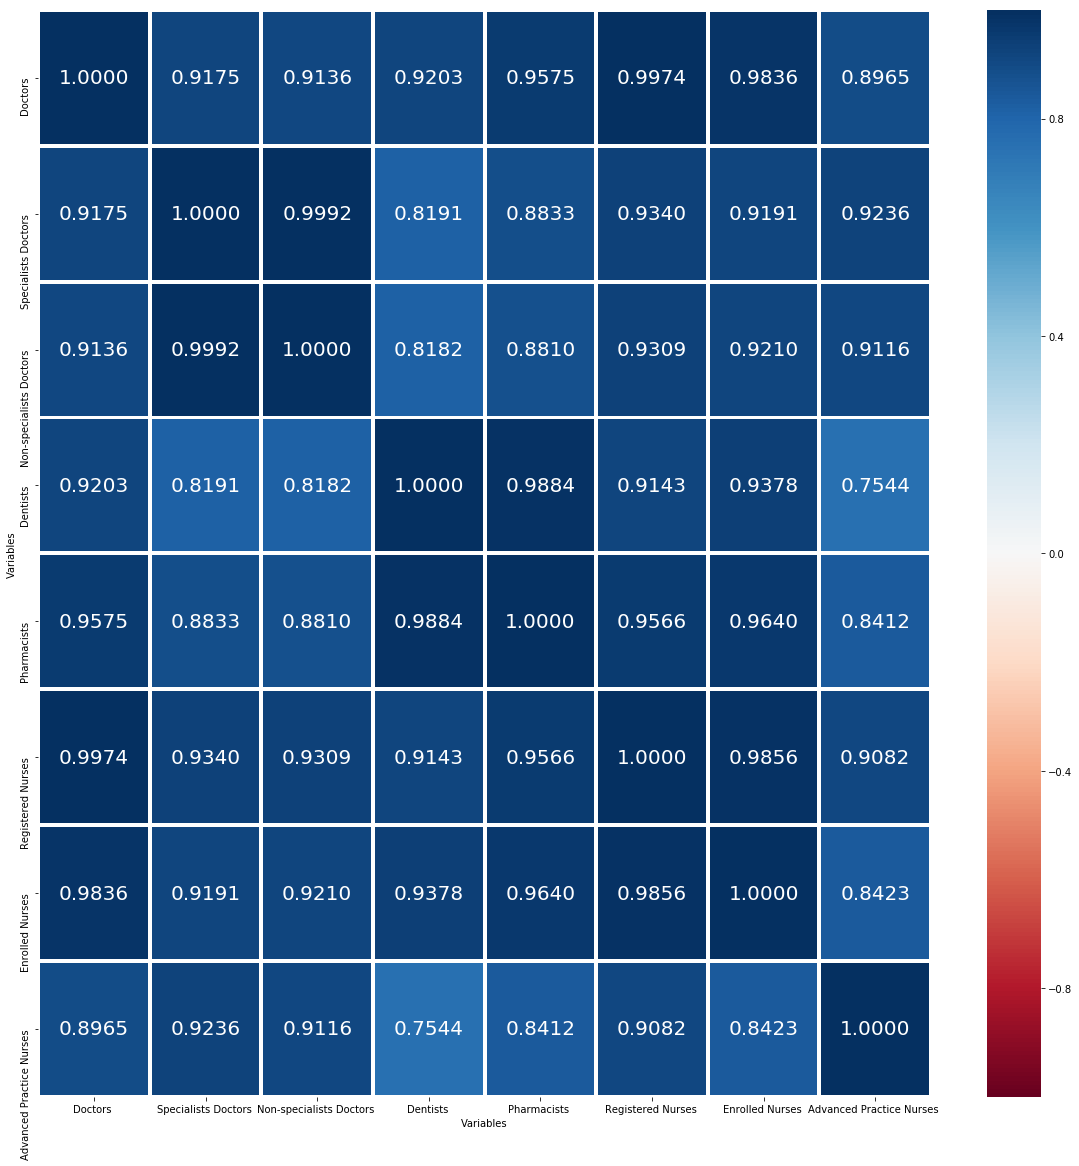

In [34]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(doc.corr(), vmin = -1, vmax = 1, linewidths = 3,
           annot = True, fmt = ".4f", annot_kws = {"size": 20}, cmap = "RdBu")

Hence, from this heatmap it can clearly be seen that Doctors and Registered Nurses have a correlation of 0.9974.